# kiloJoule Demo

This Jupyter notebook provides a quick preview of the capabilities of the [`kilojoule`](https://pypi.org/project/kilojoule/) library. This notebook will be interactive if you are viewing it in a live notebook environment, such as Binder. [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/johnfmaddox/kilojoule-binder/HEAD?urlpath=git-pull?repo=https://github.com/johnfmaddox/kilojoule-notebooks)

- The code cells below are editable. 
- To (re)execute a cell, select the cell and press **Ctrl+Enter** (or **Shift+Enter** to also move focus to the next cell).
- Each cell should be executed in order because later cells may depend on values defined in a previous cell.
- The **next cell** loads the `kilojoule` library and **must be executed each session**.

After reading through this notebook, you can find more detailed documentation, installation, and usage instructions in the [Tutorials](./Tutorials) folder, and additional examples in the [Examples](./Examples) folder.


In [3]:
########## RUN THIS CELL FIRST!!! ##########
# Import the library
from kilojoule import *
states.add_to_namespace()

## Equation Formatting
Automated display of calculation progression for variable assignment:
- Symbolic form (symbols inferred from variable names)
- Expanded numeric form showing the value of each variable at the time of execution
- Final numeric value

In [4]:
%%showcalc
psi = 5
sigma_v = 17
theta_alpha_2 = 2/3*pi
phi = 3*psi**2 + sqrt(sigma_v/2) - abs(8*cos(theta_alpha_2)/(3-psi))

\begin{align}
  \psi &=  5 
\end{align}

\begin{align}
  \sigma_{v} &=  17 
\end{align}

\begin{align}
  \theta_{\alpha,2} &=   \frac{ 2 }{ 3 }  \cdot  \pi  \\
    &=  \frac{ 2 }{ 3 }  \cdot   3.1416  \\
    &=  2.0944 
\end{align}

\begin{align}
  \phi &=    3  \cdot  {\psi}^{2}  + \sqrt{\frac{ \sigma_{v} }{ 2 }} -  \left| \frac{  8  \cdot  \mathrm{ cos }\left( \theta_{\alpha,2} \right)  }{  3 - \psi  } \right|  \\
    &=   3  \cdot  { 5 }^{2}  + \sqrt{\frac{  17  }{ 2 }} -  \left| \frac{  8  \cdot  \mathrm{ cos }\left(  2.0944  \right)  }{  3 -  5   } \right| \\
    &=  75.915 
\end{align}



## Physical Units as Part of Calculations
lnclude physical units in calculations with automated conversion to maintain consistency

In [5]:
%%showcalc
"Define geometry and flow parameters for cylinder experiencing covective heat transfer"
T_inf = Quantity(20,'degC')
T_s = Quantity(125,'degC')
L = Quantity(75,'mm')
D = Quantity(2.5,'cm')
h_conv = Quantity(200,'W/m^2/delta_degC')

"Surface Area of a cylinder"
A_s = (pi*D*L).to('m^2')

"Heat transfer from cylinder surface using Newton's Law of Cooling"
q = h_conv*A_s*(T_s-T_inf)

Define geometry and flow parameters for cylinder experiencing covective heat transfer
\begin{align}
  T_{\infty} &=  20\ \mathrm{°C} 
\end{align}

\begin{align}
  T_{s} &=  125\ \mathrm{°C} 
\end{align}

\begin{align}
  L &=  75\ \mathrm{mm} 
\end{align}

\begin{align}
  D &=  2.5\ \mathrm{cm} 
\end{align}

\begin{align}
  h_{conv} &=  200\ \frac{\mathrm{W}}{\left(\mathrm{m}^{2} \cdot \mathrm{Δ°C}\right)} 
\end{align}

Surface Area of a cylinder
\begin{align}
  A_{s} &=    \pi  \cdot  D   \cdot  L  \\
    &=    3.1416   \cdot  2.5\ \mathrm{cm}   \cdot  75\ \mathrm{mm} \\
    &= 0.0058905\ \mathrm{m}^{2}
\end{align}

Heat transfer from cylinder surface using Newton's Law of Cooling
\begin{align}
  q &=    h_{conv}  \cdot  A_{s}   \cdot  \left(  T_{s} - T_{\infty}  \right)  \\
    &=   200\ \frac{\mathrm{W}}{\left(\mathrm{m}^{2} \cdot \mathrm{Δ°C}\right)}  \cdot  0.0058905\ \mathrm{m}^{2}   \cdot  \left(  125\ \mathrm{°C} - 20\ \mathrm{°C}  \right) \\
    &= 123.7\ \mathrm{W}
\end{align}



## Solution Checking
When used for educational purposes, the `kilojoule` library allows solutions to be checked for (if enabled by the notebook developer/instructor). This is particularly helpful for long, complex problems where the answers to later steps depend on the accuracy previous steps.

In [15]:
check_solutions('A_s q')

<IPython.core.display.Latex object>

## Thermophysical Property Evaluation
Look up thermophysical properties for common fluids using a common, simplified, unit-aware interface regardless of the data source
- *Real Fluid* properties from the [CoolProp](http://www.coolprop.org/) library (can be pointed to a RefProp database if you have a license)
- *Ideal Gas* properties from the [PYroMat](http://pyromat.org/) library
- Custom properties from any tabular data set by using one of the `kilojoule` table templates

In [6]:
########## RUN THIS CELL TO LOAD PROPERTY TABLES ##########
water = realfluid.Properties('water')
air = idealgas.Properties('air')

### Real Fluid Properties
The following example analyzes a non-ideal steam turbine with an isentropic efficiency of $\eta_t=80\%$.

In [7]:
%%showcalc
"Define inlet temperature, inlet pressure, and exit pressure for a turbine with an isentropic efficiency of 80%." 
T['i'] = Quantity(600.0, 'degC')
p['i'] = Quantity(4.0, 'MPa')
p['e'] = Quantity(50.0, 'kPa')
eta_t = Quantity(0.80, '')

"Look up specific enthalpy and entropy at the inlet"
h['i'] = water.h(T['i'], p['i'])
s['i'] = water.s(T['i'], p['i'])

"Look up enthalpy at exit if the turbine were isentropic"
s['e,s'] = s['i']
p['e,s'] = p['e']
h['e,s'] = water.h(p['e,s'], s['e,s'])

"Calculate actual exit enthalpy"
h['e'] = h['i'] - eta_t*(h['i']-h['e,s'])

"Look up temperature at actual exit state"
T['e'] = water.T(p['e'], h=h['e'])

"Use `states.fix()` function to pull all available values from the tables for each state to reduce the amount of code that needs to be written and maintained"
states.fix('i', water , T['i'], p['i'])
states.fix('e', water , T['e'], p['e'])
states.fix('e,s', water, p['e,s'], h=h['e,s']) 

Define inlet temperature, inlet pressure, and exit pressure for a turbine with an isentropic efficiency of 80%.
\begin{align}
  {T}_{ i } &=  600.0\ \mathrm{°C}  = 873.15\ \mathrm{K} 
\end{align}

\begin{align}
  {p}_{ i } &=  4.0\ \mathrm{MPa}  = 4\times 10^{6}\ \mathrm{Pa} 
\end{align}

\begin{align}
  {p}_{ e } &=  50.0\ \mathrm{kPa}  = 5\times 10^{4}\ \mathrm{Pa} 
\end{align}

\begin{align}
  \eta_{t} &=  0.8 
\end{align}

Look up specific enthalpy and entropy at the inlet
\begin{align}
  {h}_{ i } &=  \mathrm{ \underset{ water }{ h } }\left( {T}_{ i }, {p}_{ i } \right)  = \mathrm{ \underset{ water }{ h } }\left( 873.15\ \mathrm{K}, 4\times 10^{6}\ \mathrm{Pa} \right) = 3.6749\times 10^{6}\ \frac{\mathrm{J}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ i } &=  \mathrm{ \underset{ water }{ s } }\left( {T}_{ i }, {p}_{ i } \right)  = \mathrm{ \underset{ water }{ s } }\left( 873.15\ \mathrm{K}, 4\times 10^{6}\ \mathrm{Pa} \right) = 7370.5\ \frac{\mathrm{J}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

Look up enthalpy at exit if the turbine were isentropic
\begin{align}
  {s}_{ {e,s} } &=  {s}_{ i }  = 7370.5\ \frac{\mathrm{J}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {p}_{ {e,s} } &=  {p}_{ e }  = 5\times 10^{4}\ \mathrm{Pa} 
\end{align}

\begin{align}
  {h}_{ {e,s} } &=  \mathrm{ \underset{ water }{ h } }\left( {p}_{ {e,s} }, {s}_{ {e,s} } \right)  = \mathrm{ \underset{ water }{ h } }\left( 5\times 10^{4}\ \mathrm{Pa}, 7370.5\ \frac{\mathrm{J}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 2.5664\times 10^{6}\ \frac{\mathrm{J}}{\mathrm{kg}}
\end{align}

Calculate actual exit enthalpy
\begin{align}
  {h}_{ e } &=   {h}_{ i } -  \eta_{t}  \cdot  \left(  {h}_{ i } - {h}_{ {e,s} }  \right)   \\
    &=  3.6749\times 10^{6}\ \frac{\mathrm{J}}{\mathrm{kg}} -  0.8  \cdot  \left(  3.6749\times 10^{6}\ \frac{\mathrm{J}}{\mathrm{kg}} - 2.5664\times 10^{6}\ \frac{\mathrm{J}}{\mathrm{kg}}  \right)  \\
    &= 2.7881\times 10^{6}\ \frac{\mathrm{J}}{\mathrm{kg}}
\end{align}

Look up temperature at actual exit state
\begin{align}
  {T}_{ e } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ e }, \mathrm{ h } = {h}_{ e } \right)  = \mathrm{ \underset{ water }{ T } }\left( 5\times 10^{4}\ \mathrm{Pa}, \mathrm{ h } = 2.7881\times 10^{6}\ \frac{\mathrm{J}}{\mathrm{kg}} \right) = 427.18\ \mathrm{K}
\end{align}

Use `states.fix()` function to pull all available values from the tables for each state to reduce the amount of code that needs to be written and maintained


Fixing state i using $T=873.15\ \mathrm{K}$, $p=4\times 10^{6}\ \mathrm{Pa}$
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>$T$ [K]</th>
      <th>$p$ [Pa]</th>
      <th>$v$ [m³/kg]</th>
      <th>$u$ [J/kg]</th>
      <th>$h$ [J/kg]</th>
      <th>$s$ [J/K/kg]</th>
      <th>$x$ []</th>
      <th>$phase$ []</th>
      <th>$c_{v}$ [J/K/kg]</th>
      <th>$c_{p}$ [J/K/kg]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>i</th>
      <td>873.15</td>
      <td>4000000.0</td>
      <td>0.098859</td>
      <td>3279433.399078</td>
      <td>3674867.522622</td>
      <td>7370.528367</td>
      <td>N/A</td>
      <td>supercritical_gas</td>
      <td>1777.163644</td>
      <td>2296.251435</td>
    </tr>
  </tbody>
</table>
<br />


Fixing state e using $T=427.18\ \mathrm{K}$, $p=5\times 10^{4}\ \mathrm{Pa}$
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>$T$ [K]</th>
      <th>$p$ [Pa]</th>
      <th>$v$ [m³/kg]</th>
      <th>$u$ [J/kg]</th>
      <th>$h$ [J/kg]</th>
      <th>$s$ [J/K/kg]</th>
      <th>$x$ []</th>
      <th>$phase$ []</th>
      <th>$c_{v}$ [J/K/kg]</th>
      <th>$c_{p}$ [J/K/kg]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>e</th>
      <td>427.177027</td>
      <td>50000.0</td>
      <td>3.927412</td>
      <td>2591687.780752</td>
      <td>2788058.359243</td>
      <td>7959.726068</td>
      <td>N/A</td>
      <td>gas</td>
      <td>1473.78577</td>
      <td>1947.767212</td>
    </tr>
  </tbody>
</table>
<br />


Fixing state e,s using $h=2.5664\times 10^{6}\ \frac{\mathrm{J}}{\mathrm{kg}}$, $p=5\times 10^{4}\ \mathrm{Pa}$
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>$T$ [K]</th>
      <th>$p$ [Pa]</th>
      <th>$v$ [m³/kg]</th>
      <th>$u$ [J/kg]</th>
      <th>$h$ [J/kg]</th>
      <th>$s$ [J/K/kg]</th>
      <th>$x$ []</th>
      <th>$phase$ []</th>
      <th>$c_{v}$ [J/K/kg]</th>
      <th>$c_{p}$ [J/K/kg]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>e,s</th>
      <td>354.466893</td>
      <td>50000.0</td>
      <td>3.129198</td>
      <td>2409896.156423</td>
      <td>2566356.068398</td>
      <td>7370.528367</td>
      <td>0.965783</td>
      <td>twophase</td>
      <td>1517.717872</td>
      <td>2021.577287</td>
    </tr>
  </tbody>
</table>
<br />


### Real Fluid Property and Phase Diagrams
Common property diagrams, such as $p$-$v$, $T$-$s$, $h$-$s$, etc. can be generated with a single command for any fluid and property combination included in the property libraries (this includes any custom material properties tables built using one of the `kilojoule` templates). 

Individual states and process paths between those states can be plotted to-scale and labeled with the simplified syntax shown below. The shapes of the process paths are calculated using the property tables while holding an arbitrary property constant. The diagram below shows 

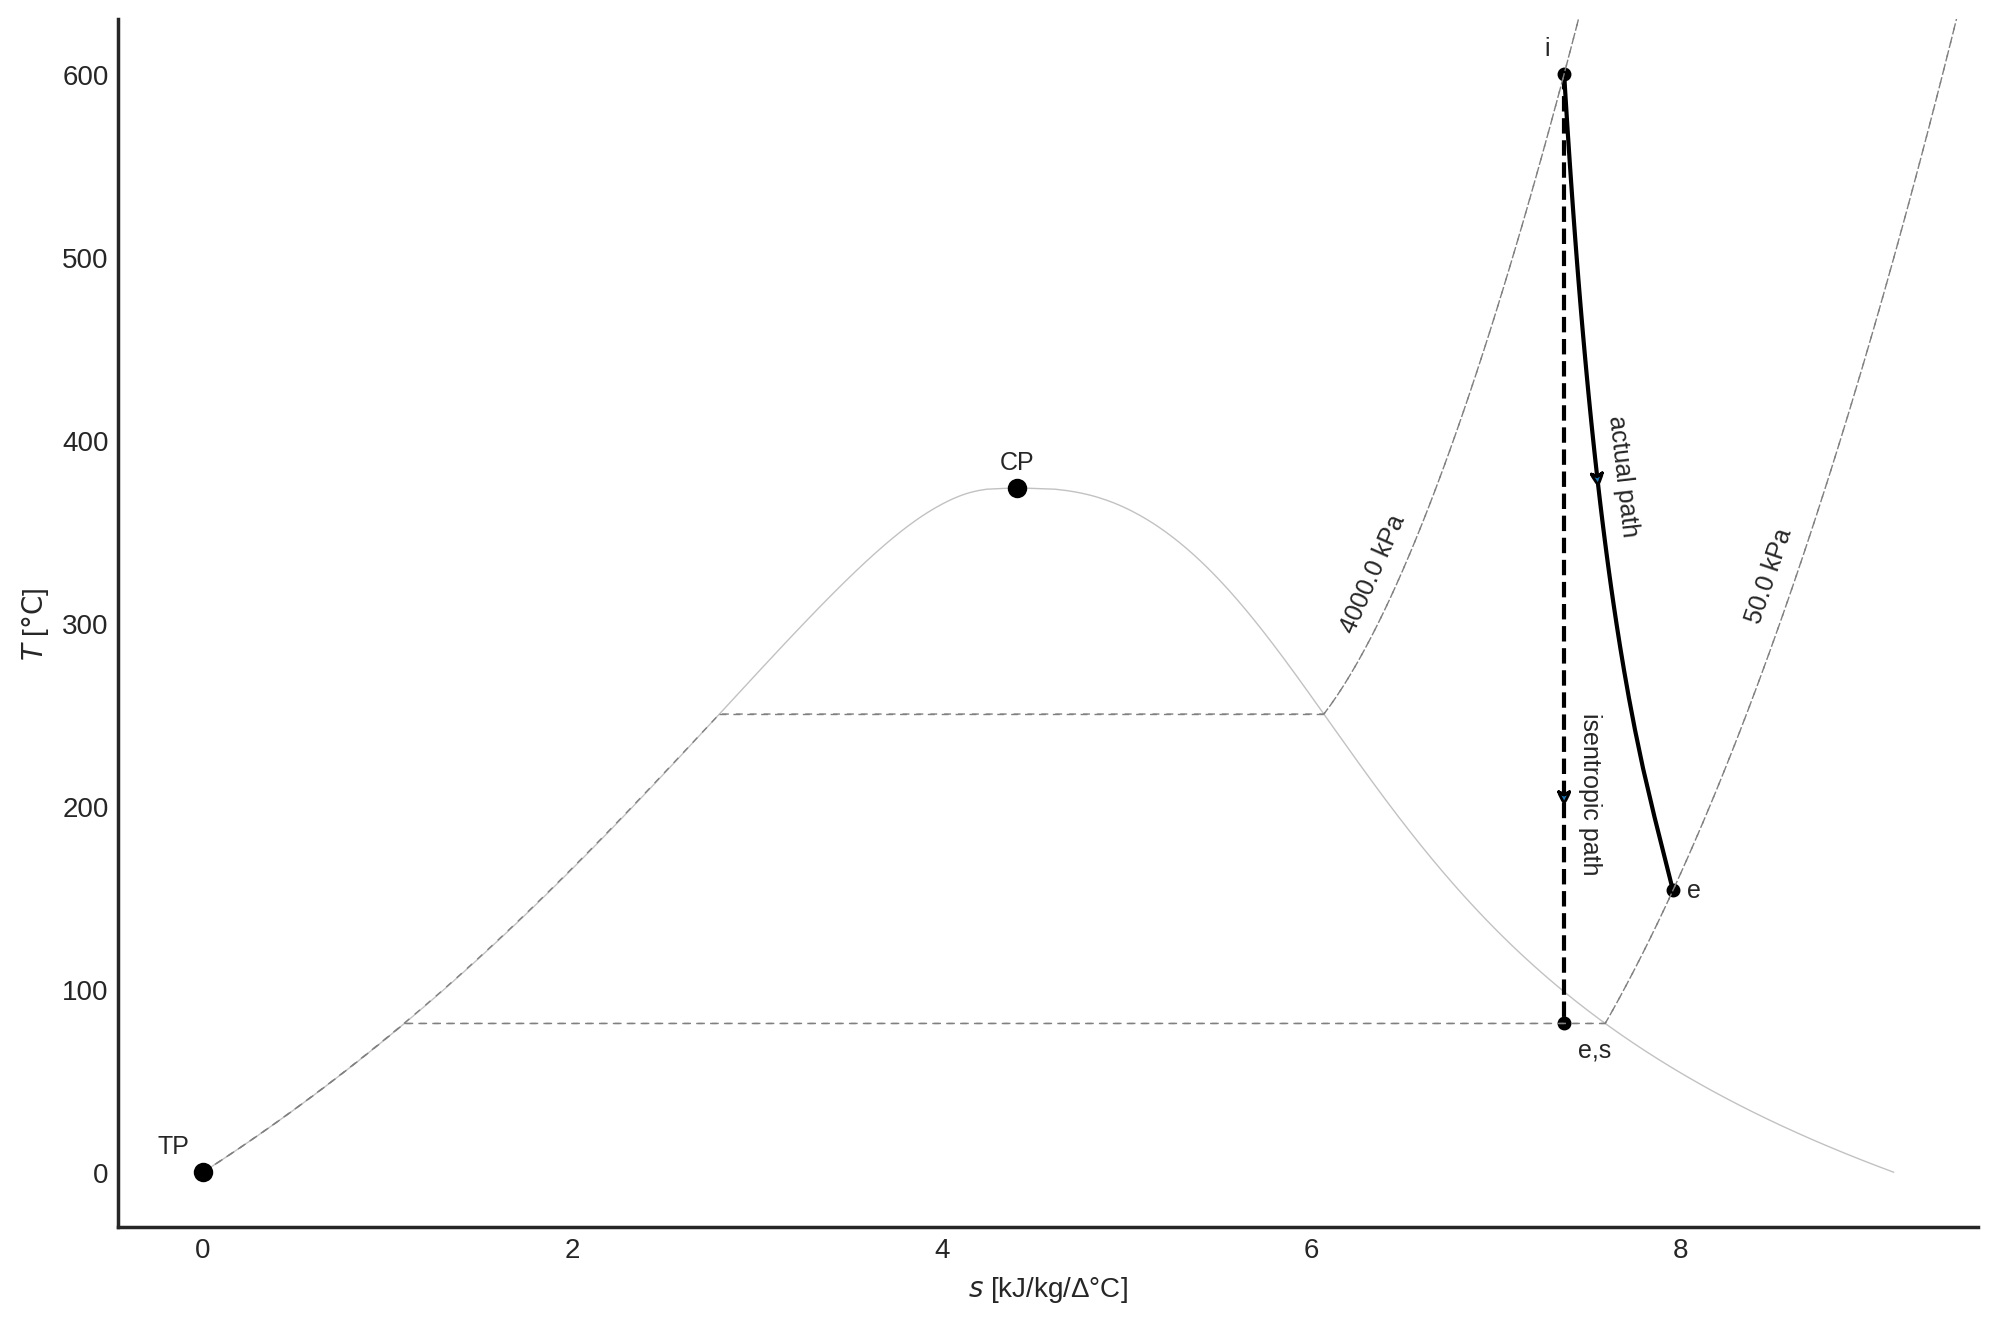

In [8]:
Ts = water.Ts_diagram()
p.set_units('kPa')

Ts.plot_state(states['i'], label_loc='north west')
Ts.plot_state(states['e,s'], label_loc='south east')
Ts.plot_state(states['e'], label_loc='east')
    
Ts.plot_process(states['i'], states['e,s'], path='isentropic', linestyle='dashed', label='isentropic path', pos=0.75)
Ts.plot_process(states['i'], states['e'], path='nonideal', label='actual path', pos=0.5)

Ts.plot_isobar(p['i'], label=f'{p["i"]}',pos=.5)
Ts.plot_isobar(p['e'], label=f'{p["e"]}',pos=.5);

Ts.plot_triple_point(label='TP',label_loc='northwest')
Ts.plot_critical_point(label_loc='north')

### Ideal Gas Properties (Variable Specific Heat)
The following example analyzes a non-ideal air compressor with an isentropic efficiency of $\eta_c=85\%$.  

You'll may notice many similarities between this example and the previous one. Even though the data used in this example came from a different property source, the commands for interacting with the property database use the same syntax, which would not be the case if you used those libraries directly without the `kilojoule` wrapper.

In [9]:
%%showcalc
"Define inlet temperature, inlet pressure, and exit pressure for a compressor with an isentropic efficiency of 85%." 
T[1] = Quantity(20, 'degC')
p[1] = Quantity(1, 'atm')
p[2] = 8*p[1]
eta_c = Quantity(0.85, '')

"Look up specific enthalpy and entropy at the inlet"
h[1] = air.h(T[1], p[1])
s[1] = air.s(T[1], p[1])

"Look up enthalpy at exit if the turbine were isentropic"
s['2,s'] = s[1]
p['2,s'] = p[2]
h['2,s'] = air.h(p['2,s'], s['2,s']) # Note: this operation is not possible using ideal-gas tables provided in the appendix of most thermodynamic textbooks

"Calculate actual exit enthalpy"
h[2] = h[1] + (h['2,s']-h[1])/eta_c

"Use `states.fix()` function to pull all available values from the tables for each state to reduce the amount of code that needs to be written and maintained"
states.fix(1, air , T['1'], p['1'])
states.fix(2, air , p['2'], h=h['2'])
states.fix('2,s', air, p['2,s'], h=h['2,s']) 

Define inlet temperature, inlet pressure, and exit pressure for a compressor with an isentropic efficiency of 85%.
\begin{align}
  {T}_{ 1 } &=  20\ \mathrm{°C}  = 293.15\ \mathrm{K} 
\end{align}

\begin{align}
  {p}_{ 1 } &=  1\ \mathrm{atm}  = 101.33\ \mathrm{kPa} 
\end{align}

\begin{align}
  {p}_{ 2 } &=   8  \cdot  {p}_{ 1 }  \\
    &=  8  \cdot  101.33\ \mathrm{kPa} \\
    &= 810.6\ \mathrm{kPa}
\end{align}

\begin{align}
  \eta_{c} &=  0.85 
\end{align}

Look up specific enthalpy and entropy at the inlet
\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ air }{ h } }\left( {T}_{ 1 }, {p}_{ 1 } \right)  = \mathrm{ \underset{ air }{ h } }\left( 293.15\ \mathrm{K}, 101.33\ \mathrm{kPa} \right) = -9288.9\ \frac{\mathrm{J}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ air }{ s } }\left( {T}_{ 1 }, {p}_{ 1 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 293.15\ \mathrm{K}, 101.33\ \mathrm{kPa} \right) = 6680.7\ \frac{\mathrm{J}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

Look up enthalpy at exit if the turbine were isentropic
\begin{align}
  {s}_{ {2,s} } &=  {s}_{ 1 }  = 6680.7\ \frac{\mathrm{J}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {p}_{ {2,s} } &=  {p}_{ 2 }  = 810.6\ \mathrm{kPa} 
\end{align}

\begin{align}
  {h}_{ {2,s} } &=  \mathrm{ \underset{ air }{ h } }\left( {p}_{ {2,s} }, {s}_{ {2,s} } \right)  = \mathrm{ \underset{ air }{ h } }\left( 810.6\ \mathrm{kPa}, 6680.7\ \frac{\mathrm{J}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 2.2922\times 10^{5}\ \frac{\mathrm{J}}{\mathrm{kg}}
\end{align}

Calculate actual exit enthalpy
\begin{align}
  {h}_{ 2 } &=  {h}_{ 1 } + \frac{  {h}_{ {2,s} } - {h}_{ 1 }  }{ \eta_{c} } \\
    &= -9288.9\ \frac{\mathrm{J}}{\mathrm{kg}} + \frac{  2.2922\times 10^{5}\ \frac{\mathrm{J}}{\mathrm{kg}} - \left( -9288.9\ \frac{\mathrm{J}}{\mathrm{kg}} \right)  }{ 0.85 }\\
    &= 2.7131\times 10^{5}\ \frac{\mathrm{J}}{\mathrm{kg}}
\end{align}

Use `states.fix()` function to pull all available values from the tables for each state to reduce the amount of code that needs to be written and maintained


Fixing state 1 using $T=293.15\ \mathrm{K}$, $p=101.33\ \mathrm{kPa}$
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>$T$ [K]</th>
      <th>$p$ [kPa]</th>
      <th>$v$ [m³/kg]</th>
      <th>$u$ [J/kg]</th>
      <th>$h$ [J/kg]</th>
      <th>$s$ [J/K/kg]</th>
      <th>$x$ []</th>
      <th>$phase$ []</th>
      <th>$c_{v}$ [J/K/kg]</th>
      <th>$c_{p}$ [J/K/kg]</th>
      <th>$k$ []</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>293.15</td>
      <td>101.325</td>
      <td>0.830491</td>
      <td>-93438.435835</td>
      <td>-9288.948891</td>
      <td>6680.718814</td>
      <td>-</td>
      <td>-</td>
      <td>717.407272</td>
      <td>1004.459931</td>
      <td>1.400125</td>
    </tr>
  </tbody>
</table>
<br />


Fixing state 2 using $h=2.7131\times 10^{5}\ \frac{\mathrm{J}}{\mathrm{kg}}$, $p=810.6\ \mathrm{kPa}$
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>$T$ [K]</th>
      <th>$p$ [kPa]</th>
      <th>$v$ [m³/kg]</th>
      <th>$u$ [J/kg]</th>
      <th>$h$ [J/kg]</th>
      <th>$s$ [J/K/kg]</th>
      <th>$x$ []</th>
      <th>$phase$ []</th>
      <th>$c_{v}$ [J/K/kg]</th>
      <th>$c_{p}$ [J/K/kg]</th>
      <th>$k$ []</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>568.174089</td>
      <td>810.6</td>
      <td>0.201204</td>
      <td>108212.848046</td>
      <td>271308.730894</td>
      <td>6757.566477</td>
      <td>-</td>
      <td>-</td>
      <td>756.458015</td>
      <td>1043.510674</td>
      <td>1.379469</td>
    </tr>
  </tbody>
</table>
<br />


Fixing state 2,s using $h=2.2922\times 10^{5}\ \frac{\mathrm{J}}{\mathrm{kg}}$, $p=810.6\ \mathrm{kPa}$
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>$T$ [K]</th>
      <th>$p$ [kPa]</th>
      <th>$v$ [m³/kg]</th>
      <th>$u$ [J/kg]</th>
      <th>$h$ [J/kg]</th>
      <th>$s$ [J/K/kg]</th>
      <th>$x$ []</th>
      <th>$phase$ []</th>
      <th>$c_{v}$ [J/K/kg]</th>
      <th>$c_{p}$ [J/K/kg]</th>
      <th>$k$ []</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2,s</th>
      <td>527.675809</td>
      <td>810.6</td>
      <td>0.186863</td>
      <td>77748.334964</td>
      <td>229219.078926</td>
      <td>6680.718814</td>
      <td>-</td>
      <td>-</td>
      <td>748.136671</td>
      <td>1035.18933</td>
      <td>1.38369</td>
    </tr>
  </tbody>
</table>
<br />


### Ideal Gas Property Diagrams
As with the previous example, property diagrams can be generated for ideal gases as well using the same syntax as before.

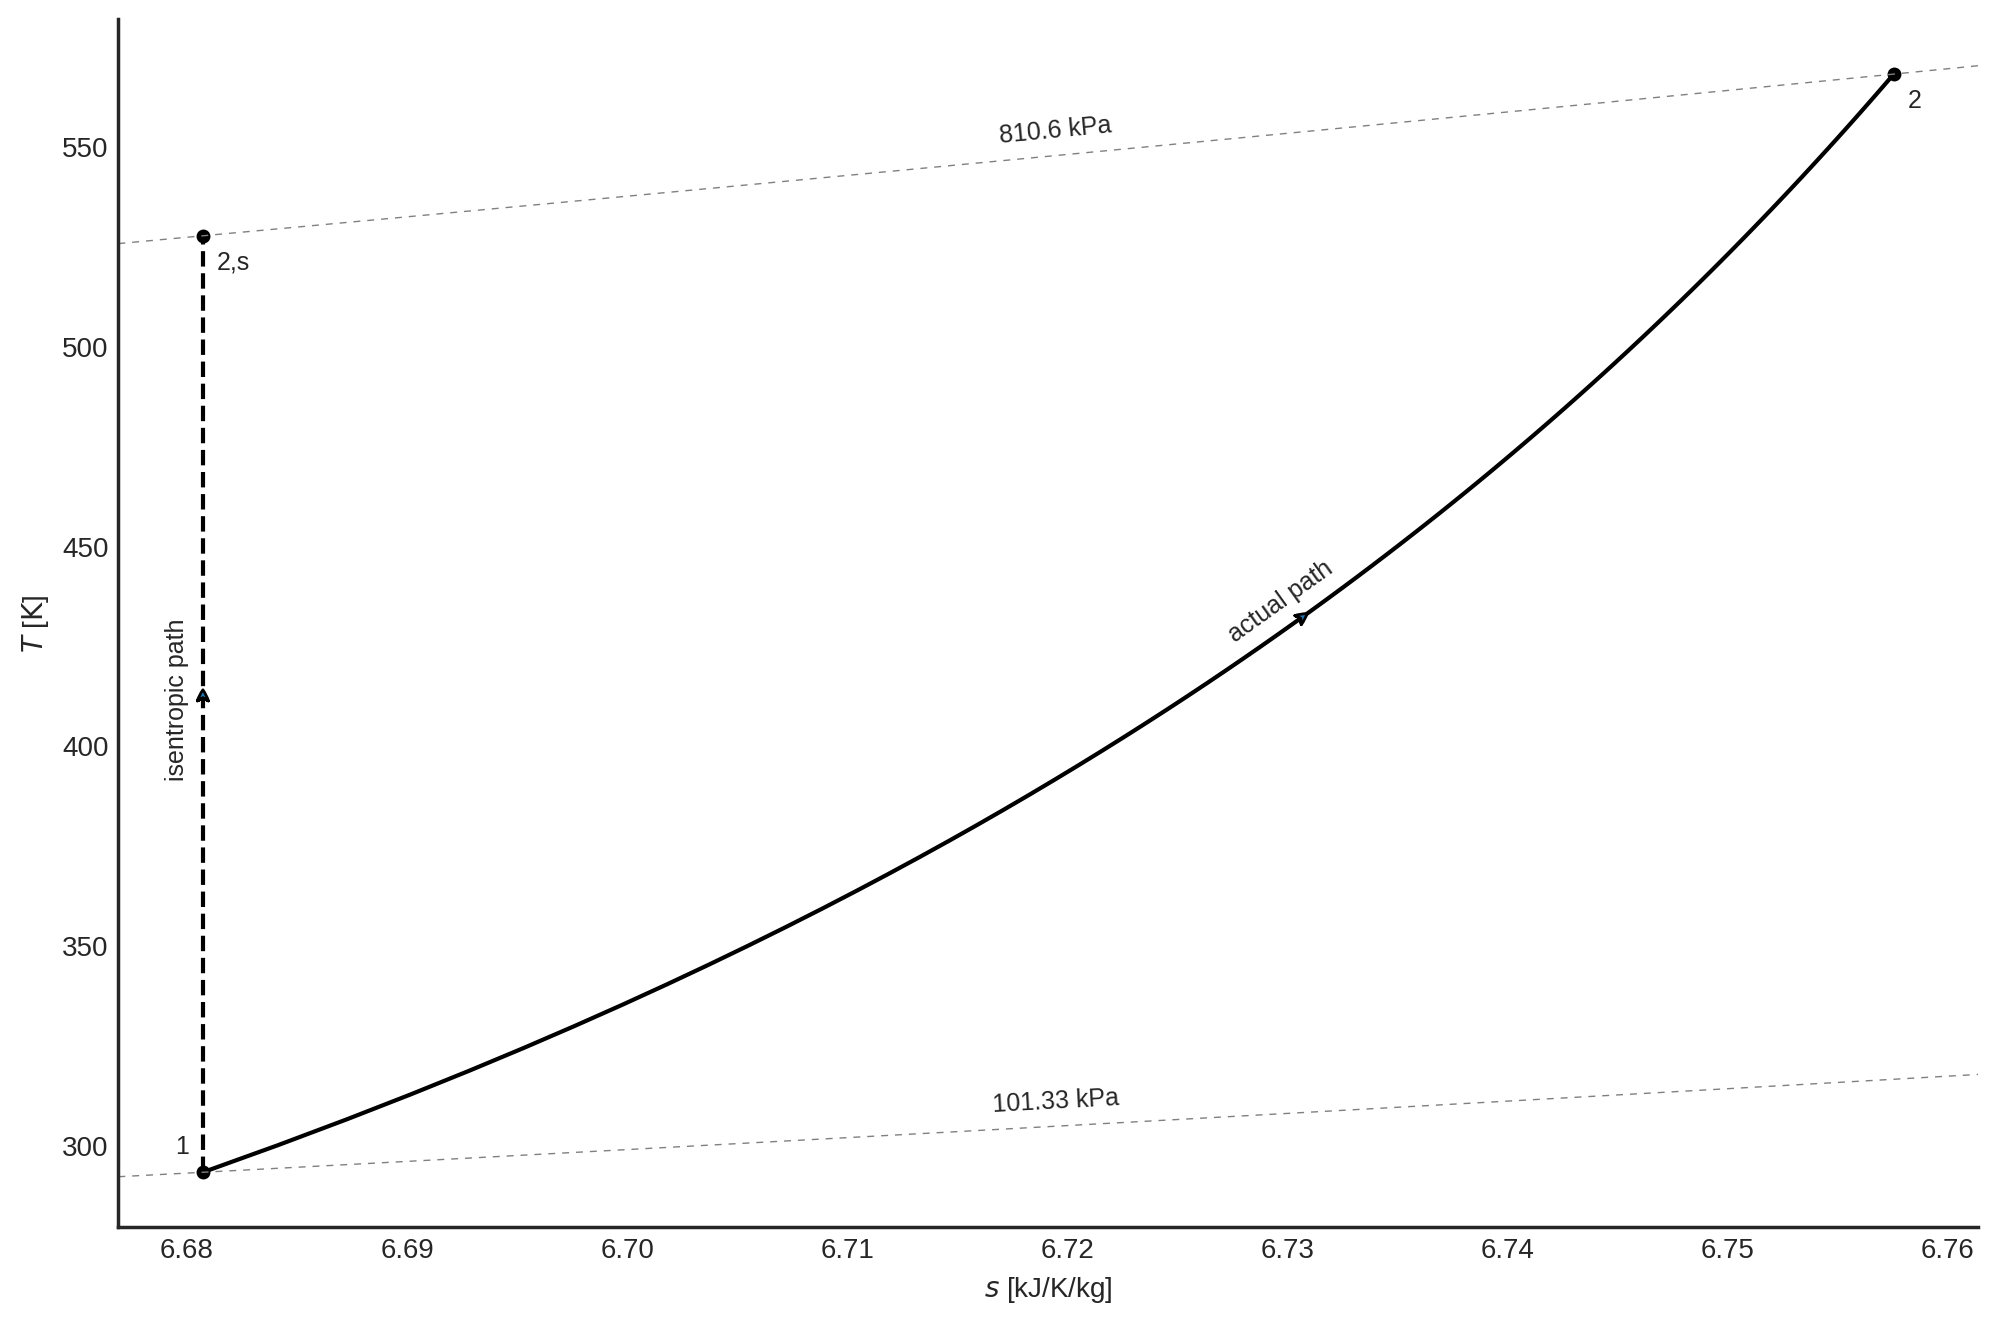

In [10]:
Ts = air.Ts_diagram()
p.set_units('kPa')

Ts.plot_state(states[1], label_loc='north west')
Ts.plot_state(states['2,s'], label_loc='south east')
Ts.plot_state(states[2], label_loc='south east')
    
Ts.plot_process(states[1], states['2,s'], path='isentropic', linestyle='dashed', label='isentropic path', pos=0.5)
Ts.plot_process(states[1], states[2], path='nonideal', label='actual path', pos=0.5)

Ts.plot_isobar(p[1], label=f'{p[1]}',pos=.5)
Ts.plot_isobar(p[2], label=f'{p[2]}',pos=.5);

## Worskpace Overview
Use the `Summary()` command to see a quick snapshot of all the variable with physical units currently defined in memory.

In [11]:
Summary();

<IPython.core.display.Latex object>

,$T$ [K],$p$ [kPa],$v$ [m³/kg],$u$ [J/kg],$h$ [J/kg],$s$ [J/K/kg],$x$ [],$phase$ [],$c_{v}$ [J/K/kg],$c_{p}$ [J/K/kg],$k$ []
1,293.150000,101.325,0.830491,-9.343844e+04,-9.288949e+03,6680.718814,-,-,717.407272,1004.459931,1.400125
2,568.174089,810.600,0.201204,1.082128e+05,2.713087e+05,6757.566477,-,-,756.458015,1043.510674,1.379469
"2,s",527.675809,810.600,0.186863,7.774833e+04,2.292191e+05,6680.718814,-,-,748.136671,1035.189330,1.383690
e,427.177027,50.000,3.927412,2.591688e+06,2.788058e+06,7959.726068,N/A,gas,1473.785770,1947.767212,-
"e,s",354.466893,50.000,3.129198,2.409896e+06,2.566356e+06,7370.528367,0.965783,twophase,1517.717872,2021.577287,-
i,873.150000,4000.000,0.098859,3.279433e+06,3.674868e+06,7370.528367,N/A,supercritical_gas,1777.163644,2296.251435,-
